In [ ]:
pip install tsplib95

In [9]:
import tsplib95 
import random
import math
import time
import copy
import matplotlib.pyplot as plt

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Max Cost: 7887
Min Cost: 7887
Average Cost: 7887
Average Time: 3.0707240104675293


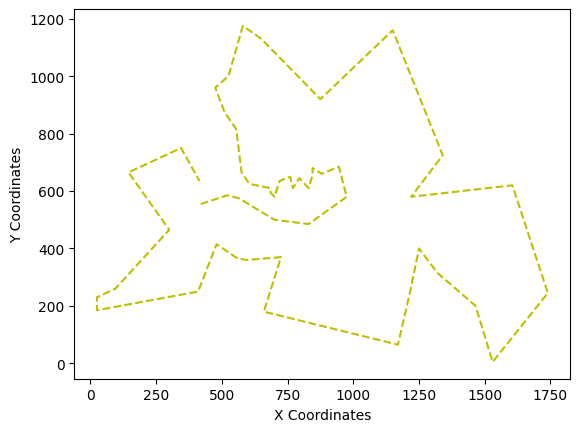

In [14]:
#Change tsp file name to run on separate tsp datasets
data = tsplib95.load('/content/drive/MyDrive/berlin52.tsp')
cities = list(data.get_nodes())

def annealing(initial_state):

    """Peforms simulated annealing to find a solution"""
    initial_temp = 50

    alpha = 0.95

    current_temp = initial_temp

    # Start by initializing the current state with the initial state
    solution = initial_state
    same_solution = 0
    same_cost_diff = 0

    while same_solution < 500 and same_cost_diff < 8000:
        neighbor = get_neighbors(solution)

        # Check if neighbor is best so far
        cost_diff = get_cost(neighbor) - get_cost(solution)
        # if the new solution is better, accept it
        if cost_diff > 0:
            solution = neighbor
            same_solution = 0
            same_cost_diff = 0

        elif cost_diff == 0:
            solution = neighbor
            same_solution = 0
            same_cost_diff +=1
        # if the new solution is not better, accept it with a probability of e^(-cost/temp)
        else:
            if random.uniform(0, 1) <= math.exp(float(cost_diff) / float(current_temp)):
                solution = neighbor
                same_solution = 0
                same_cost_diff = 0
            else:
                same_solution +=1
                same_cost_diff+=1
        # decrement the temperature
        current_temp = current_temp*alpha

    return solution, 1/get_cost(solution)
def euclidean_distance(city1, city2):
    """Calculate Euclidean distance between two cities."""
    x1, y1 = city1
    x2, y2 = city2
    return round(math.sqrt((x1 - x2)**2 + (y1 - y2)**2))

def get_cost(state):
    """Calculates cost/fitness for the solution/route using Euclidean distance."""
    distance = 0

    for i in range(len(state)):
        from_city = state[i]
        to_city = state[(i + 1) % len(state)]  # Wrap around to the first city for the last city
        distance += euclidean_distance(data.node_coords[from_city], data.node_coords[to_city])

    fitness = 1 / float(distance)
    return fitness


def get_neighbors(state):
    """Returns neighbor of  your solution."""

    neighbor = copy.deepcopy(state)


    func = random.choice([0,1,2,3])
    if func == 0:
        inverse(neighbor)

    elif func == 1:
        insert(neighbor)

    elif func == 2 :
        swap(neighbor)

    else:
        swap_routes(neighbor)

    return neighbor

def inverse(state):
    "Inverses the order of cities in a route between node one and node two"

    node_one = random.choice(state)
    new_list = list(filter(lambda city: city != node_one, state)) #route without the selected node one
    node_two = random.choice(new_list)
    state[min(node_one,node_two):max(node_one,node_two)] = state[min(node_one,node_two):max(node_one,node_two)][::-1]

    return state

def insert(state):
    "Insert city at node j before node i"
    node_j = random.choice(state)
    state.remove(node_j)
    node_i = random.choice(state)
    index = state.index(node_i)
    state.insert(index, node_j)

    return state

def swap(state):
    "Swap cities at positions i and j with each other"
    pos_one = random.choice(range(len(state)))
    pos_two = random.choice(range(len(state)))
    state[pos_one], state[pos_two] = state[pos_two], state[pos_one]

    return state

def swap_routes(state):
    "Select a subroute from a to b and insert it at another position in the route"
    subroute_a = random.choice(range(len(state)))
    subroute_b = random.choice(range(len(state)))
    subroute = state[min(subroute_a,subroute_b):max(subroute_a, subroute_b)]
    del state[min(subroute_a,subroute_b):max(subroute_a, subroute_b)]
    insert_pos = random.choice(range(len(state)))
    for i in subroute:
        state.insert(insert_pos, i)
    return state


best_route_distance = []
best_route = []
convergence_time = []
for i in range(10):
    start = time.time()
    route, route_distance = annealing(cities)
    time_elapsed = time.time() - start
    best_route_distance.append(route_distance)
    best_route.append(route)
    convergence_time.append(time_elapsed)
    # Print results
    print("Max Cost:", int(max(best_route_distance)))
    print("Min Cost:", int(min(best_route_distance)))
    print("Average Cost:", int(sum(best_route_distance) / len(best_route_distance)))


    print("Average Time:", sum(convergence_time) / len(convergence_time))

    #Plot Routes
    xs = [data.node_coords[i][0] for i in route]
    ys = [data.node_coords[i][1] for i in route]

    plt.clf()
    # 'bo-' means blue color, round points, solid lines
    plt.plot(xs,ys,'y--')
    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')


